#**Project 4**
#Title: Weather Data for COVID-19 Data Analysis

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data=pd.read_csv('/content/training_data_with_weather_info_week_4.csv.zip')

In [39]:
data.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,Afghanistan,0,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,...,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,Afghanistan,0,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,...,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,Afghanistan,0,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,...,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,Afghanistan,0,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,...,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,Afghanistan,0,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,...,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [41]:
data.tail()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
24409,35642,Zimbabwe,NaN,2020-04-04,9.0,1.0,Zimbabwe-,-17.829167,31.052222,95,...,66.2,80.6,999.9,NaN,53.9,0.48173,0.130122,4.2,0.0,0
24410,35643,Zimbabwe,NaN,2020-04-05,9.0,1.0,Zimbabwe-,-17.829167,31.052222,96,...,66.2,80.6,999.9,NaN,53.9,0.48173,0.130122,4.2,0.0,0
24411,35644,Zimbabwe,NaN,2020-04-06,10.0,1.0,Zimbabwe-,-17.829167,31.052222,97,...,66.2,80.6,999.9,NaN,53.9,0.48173,0.130122,4.2,0.0,0
24412,35645,Zimbabwe,NaN,2020-04-07,11.0,2.0,Zimbabwe-,-17.829167,31.052222,98,...,66.2,80.6,999.9,NaN,53.9,0.48173,0.130122,4.2,0.0,0
24413,35646,Zimbabwe,NaN,2020-04-08,11.0,3.0,Zimbabwe-,-17.829167,31.052222,99,...,66.2,80.6,999.9,NaN,53.9,0.48173,0.130122,4.2,0.0,0


In [11]:
print(len(data))

24414


In [12]:
data=data.drop_duplicates()
print("After removing the duplicates values:",len(data))

After removing the duplicates values: 24414


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24414 entries, 0 to 24413
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  24414 non-null  int64  
 1   Country_Region      24414 non-null  object 
 2   Province_State      10374 non-null  object 
 3   Date                24414 non-null  object 
 4   ConfirmedCases      24414 non-null  float64
 5   Fatalities          24414 non-null  float64
 6   country+province    24414 non-null  object 
 7   Lat                 24414 non-null  float64
 8   Long                24414 non-null  float64
 9   day_from_jan_first  24414 non-null  int64  
 10  temp                24414 non-null  float64
 11  min                 24299 non-null  float64
 12  max                 24388 non-null  float64
 13  stp                 24414 non-null  float64
 14  slp                 14309 non-null  float64
 15  dewp                23786 non-null  float64
 16  rh  

In [14]:
data.describe()

,Id,ConfirmedCases,Fatalities,Lat,Long,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
count,24414.00000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24414.000000,24299.000000,24388.000000,24414.000000,14309.000000,23786.000000,23786.000000,2.378600e+04,24414.000000,24414.000000,24414.000000
mean,17823.50000,835.249447,39.778201,24.359897,4.101068,60.500000,57.584509,48.455665,66.997486,716.109675,1016.177602,44.687060,0.657925,inf,24.438470,7.806476,0.328787
std,10300.68915,6554.109673,494.078524,23.619643,78.593946,22.515271,22.115746,22.744141,21.984603,422.561151,8.160573,22.281636,0.192454,NaN,131.914699,26.713265,0.469782
min,1.00000,0.000000,0.000000,-51.694444,-157.498300,22.000000,-33.600000,-45.400000,-20.200000,0.000000,968.900000,-40.200000,0.035440,-2.374315e+01,0.000000,0.000000,0.000000
25%,8912.25000,0.000000,0.000000,12.134722,-70.035800,41.000000,40.800000,32.000000,50.000000,24.400000,1010.900000,28.600000,0.559444,1.240723e-01,3.700000,0.000000,0.000000
50%,17823.50000,0.000000,0.000000,30.617100,9.550000,60.500000,59.000000,49.300000,69.800000,979.700000,1015.500000,44.000000,0.696205,1.918538e-01,5.800000,0.000000,0.000000
75%,26734.75000,75.000000,0.000000,41.902900,55.247100,80.000000,78.400000,69.800000,86.000000,999.900000,1021.000000,66.300000,0.792770,2.291856e-01,8.800000,0.020000,1.000000
max,35646.00000,151061.000000,17669.000000,64.963100,178.450000,99.000000,100.200000,89.600000,113.200000,999.900000,1051.700000,81.200000,1.000000,inf,999.900000,99.990000,1.000000


In [15]:
data.columns

Index(['Id', 'Country_Region', 'Province_State', 'Date', 'ConfirmedCases',
       'Fatalities', 'country+province', 'Lat', 'Long', 'day_from_jan_first',
       'temp', 'min', 'max', 'stp', 'slp', 'dewp', 'rh', 'ah', 'wdsp', 'prcp',
       'fog'],
      dtype='object')

In [16]:
# find the null values in dataset
data.isna()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24409,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
24410,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
24411,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
24412,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [17]:
data.isna().any()

,0
Id,False
Country_Region,False
Province_State,True
Date,False
ConfirmedCases,False
Fatalities,False
country+province,False
Lat,False
Long,False
day_from_jan_first,False


In [18]:
data.isna().sum()

,0
Id,0
Country_Region,0
Province_State,14040
Date,0
ConfirmedCases,0
Fatalities,0
country+province,0
Lat,0
Long,0
day_from_jan_first,0


In [19]:
#filling null values
data.fillna(method = "ffill",inplace = True)
print(data.shape)
data.isnull().sum()

(24414, 21)


<ipython-input-19-e63f716adcd6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method = "ffill",inplace = True)


,0
Id,0
Country_Region,0
Province_State,624
Date,0
ConfirmedCases,0
Fatalities,0
country+province,0
Lat,0
Long,0
day_from_jan_first,0


In [25]:
data['Province_State'].fillna(0, inplace=True)


In [26]:
data.isnull().sum()

,0
Id,0
Country_Region,0
Province_State,0
Date,0
ConfirmedCases,0
Fatalities,0
country+province,0
Lat,0
Long,0
day_from_jan_first,0


In [29]:
print(data.shape)

(24414, 21)


#1) How do confirmed cases and fatalities vary over time for different regions?

In [49]:
data.head()


,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,...,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,...,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,...,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,...,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,...,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [53]:
df = data.groupby("Country_Region")["ConfirmedCases"].sum().reset_index()
df1 = df.head(20)
df

,Country_Region,ConfirmedCases
0,Afghanistan,3898.0
1,Albania,4926.0
2,Algeria,14866.0
3,Andorra,6645.0
4,Angola,148.0
...,...,...
179,Vietnam,4844.0
180,West Bank and Gaza,3076.0
181,Western Sahara,16.0
182,Zambia,503.0


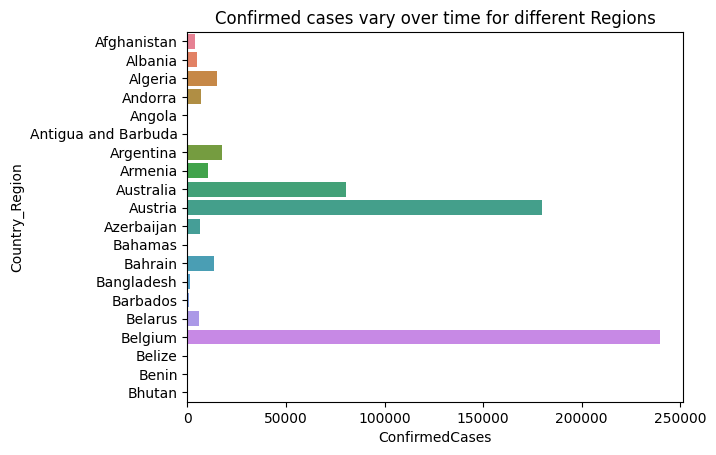

In [55]:
sns.barplot(data = df1,x = "ConfirmedCases",y = "Country_Region",hue = "Country_Region")
plt.title("Confirmed cases vary over time for different Regions")
plt.show()


In [57]:
df = data.groupby("Country_Region")["Fatalities"].sum().reset_index()
df1 = df.head(20)
df


,Country_Region,Fatalities
0,Afghanistan,98.0
1,Albania,244.0
2,Algeria,1426.0
3,Andorra,185.0
4,Angola,22.0
...,...,...
179,Vietnam,0.0
180,West Bank and Gaza,14.0
181,Western Sahara,0.0
182,Zambia,7.0


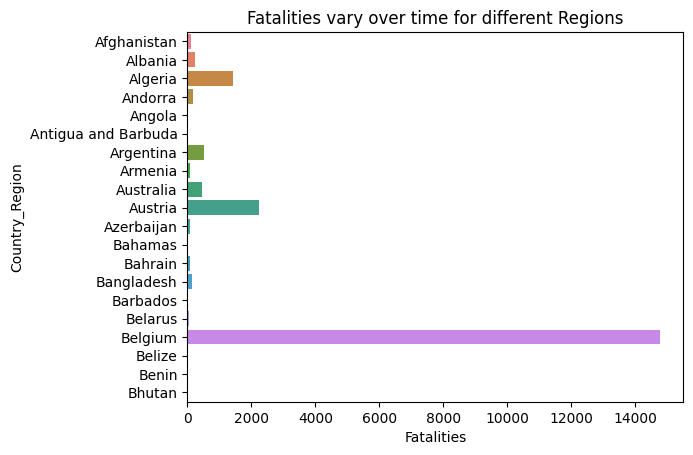

In [58]:
sns.barplot(data = df1,x = "Fatalities",y = "Country_Region",hue = "Country_Region")
plt.title("Fatalities vary over time for different Regions")
plt.show()

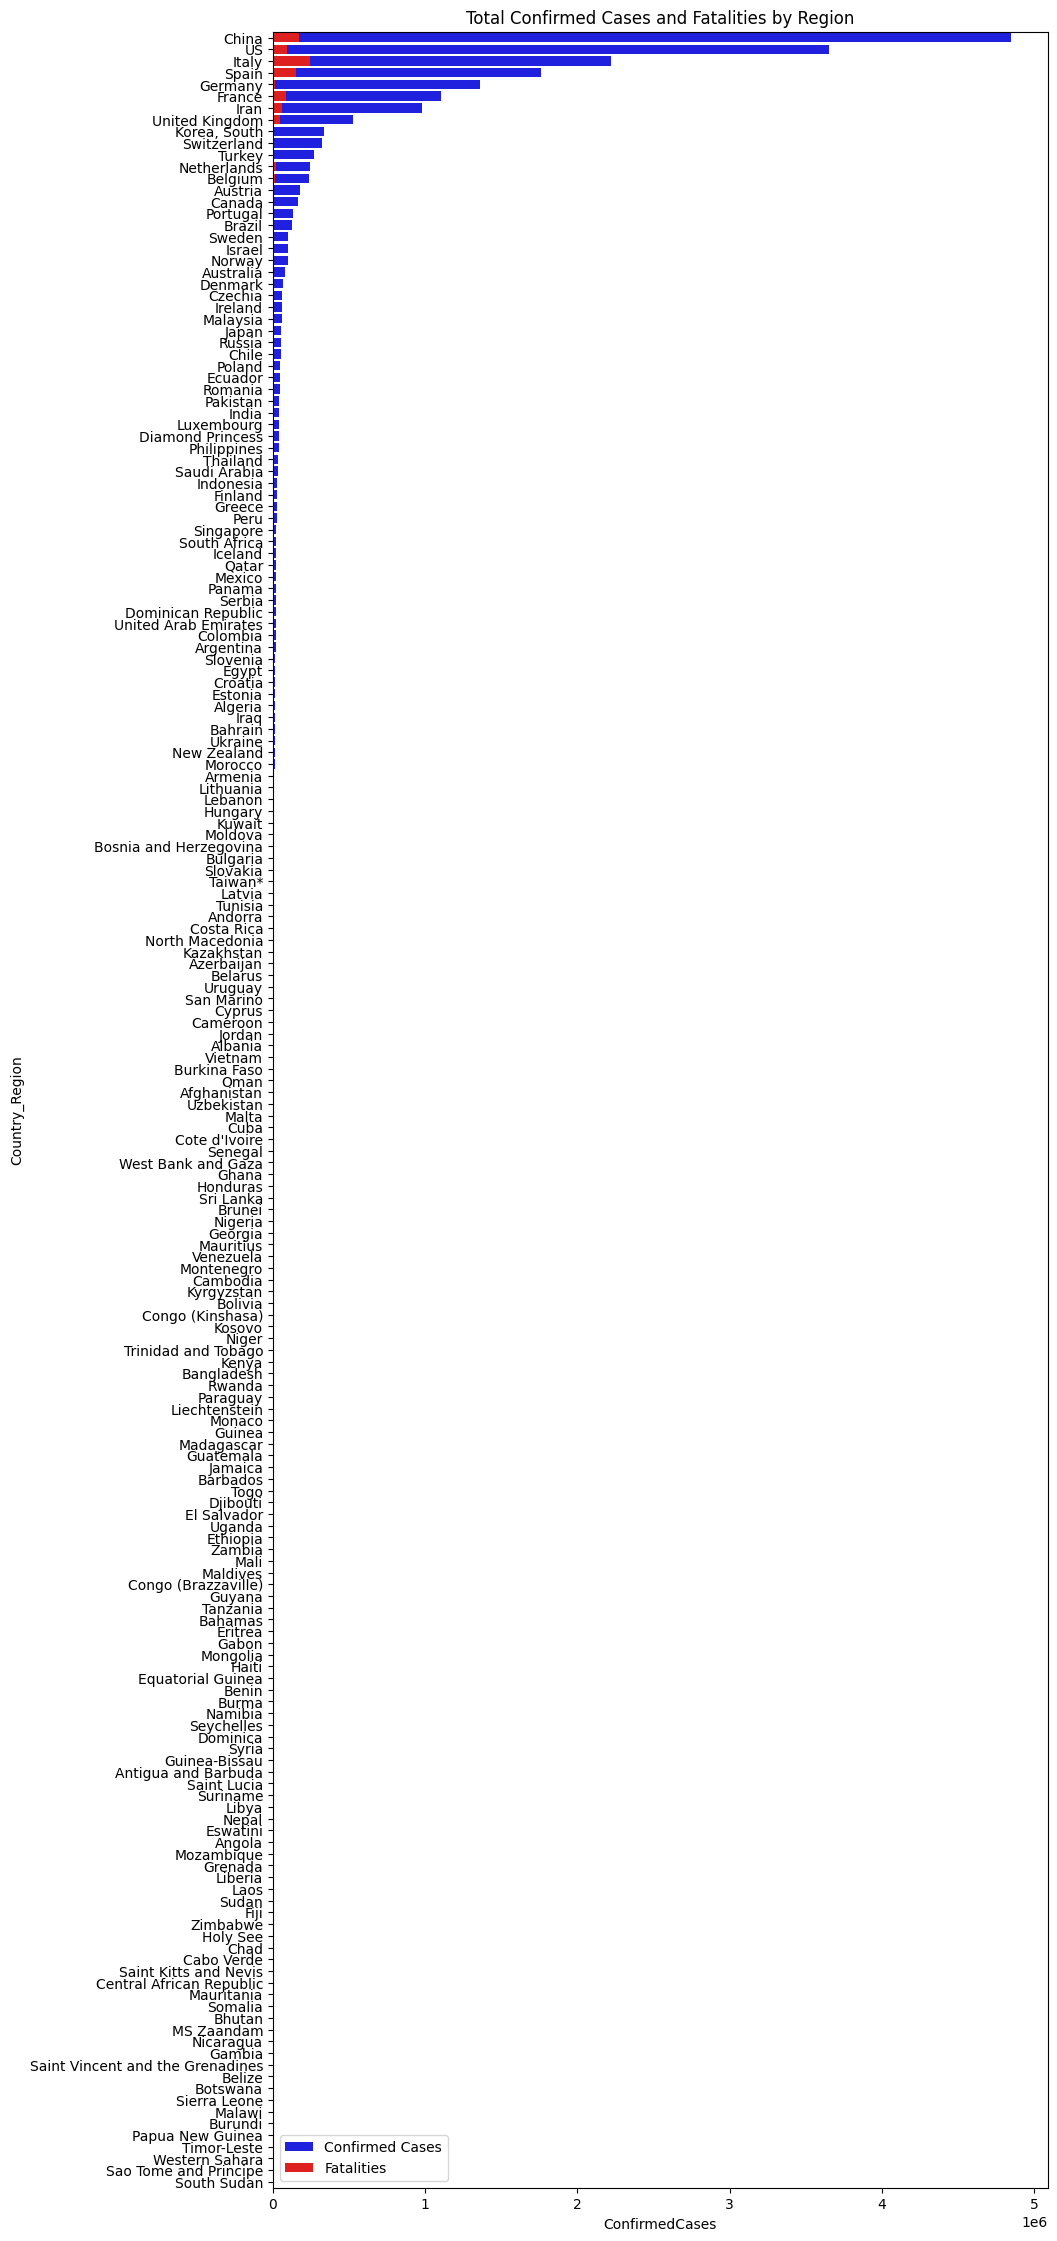

In [59]:
df1 = data.groupby('Country_Region')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
df1 = df1.sort_values(by='ConfirmedCases', ascending=False)

plt.figure(figsize=(10, 28))
sns.barplot(data=df1, x='ConfirmedCases', y='Country_Region', color='blue', label='Confirmed Cases')
sns.barplot(data=df1, x='Fatalities', y='Country_Region', color='red', label='Fatalities')
plt.title('Total Confirmed Cases and Fatalities by Region')
plt.legend()
plt.show()

#2) Which countries or regions have the highest and lowest total confirmed cases and fatalities?


In [60]:
data.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,...,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,...,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,...,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,...,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,...,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [61]:
df= data.groupby('Country_Region')[['ConfirmedCases', 'Fatalities']].sum()
df.sort_values(by='ConfirmedCases', ascending=False)
df.sort_values(by='Fatalities', ascending=False)

,ConfirmedCases,Fatalities
Country_Region,,
Italy,2217867.0,240848.0
China,4847436.0,172428.0
Spain,1762730.0,152278.0
US,3651436.0,92033.0
France,1101300.0,83133.0
...,...,...
Seychelles,194.0,0.0
Fiji,134.0,0.0
South Sudan,6.0,0.0


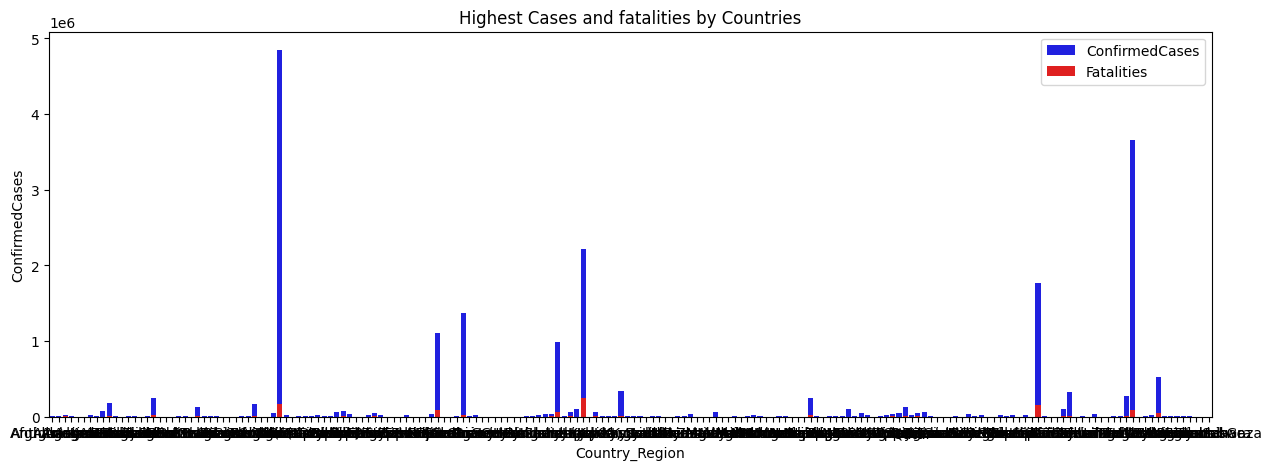

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x='Country_Region',y='ConfirmedCases',color='blue',label='ConfirmedCases')
sns.barplot(data=df,x='Country_Region',y='Fatalities',color='red',label='Fatalities')
plt.title("Highest Cases and fatalities by Countries")
plt.legend()

#3) Is there a correlation between temperature (temp) and the number of confirmed cases or fatalities?

In [71]:
data[['temp', 'Fatalities']].corr()

,temp,Fatalities
temp,1.000000,-0.022181
Fatalities,-0.022181,1.000000


Text(0.5, 1.0, 'Confirmed cases by temperature')

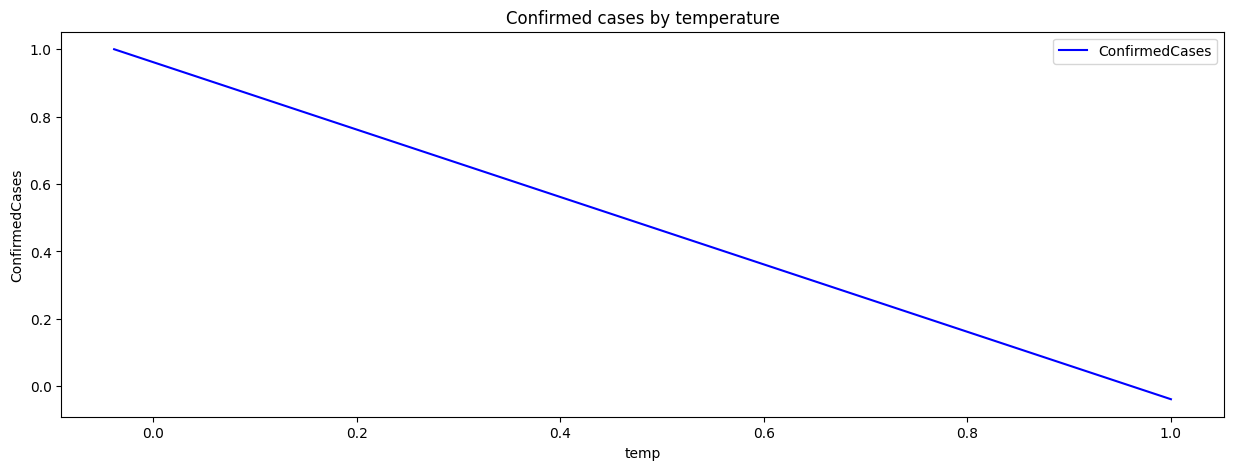

In [78]:
cor = data[['temp', 'ConfirmedCases']].corr() # Calculate correlation and assign it to 'cor'
plt.figure(figsize=(15,5))
sns.lineplot(data=cor,x='temp',y='ConfirmedCases',color='blue',label='ConfirmedCases')

plt.legend()
plt.title("Confirmed cases by temperature")

In [79]:
data[['temp', 'ConfirmedCases']].corr()


,temp,ConfirmedCases
temp,1.00000,-0.03862
ConfirmedCases,-0.03862,1.00000


Text(0.5, 1.0, 'Fatalities by temperature')

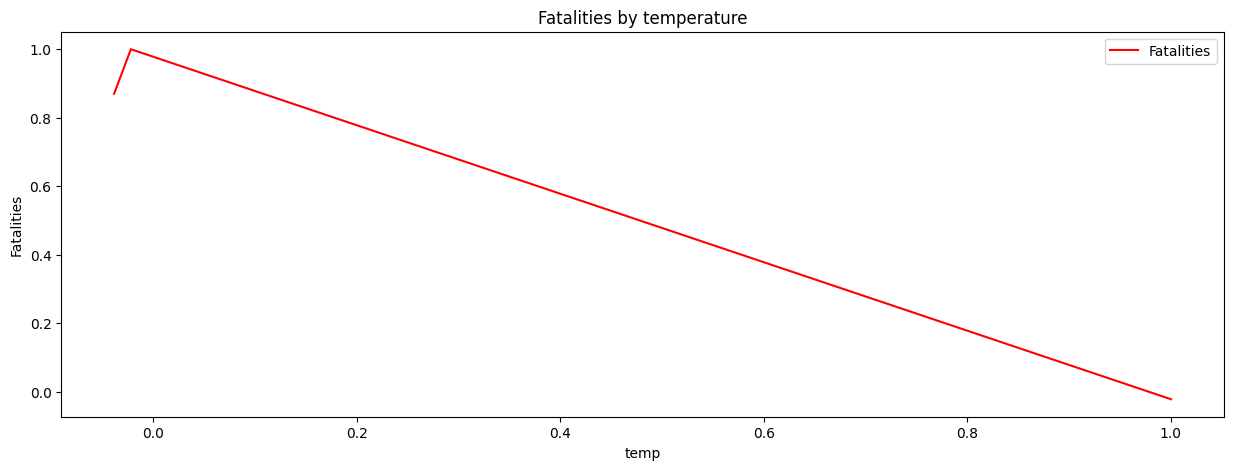

In [83]:
cor = data[['temp', 'ConfirmedCases','Fatalities']].corr() # Calculate correlation and assign it to 'cor', Include 'Fatalities'
plt.figure(figsize=(15,5))
sns.lineplot(data=cor,x='temp',y='Fatalities',color='red',label='Fatalities') # Now 'Fatalities' is available in 'cor'
plt.legend()
plt.title("Fatalities by temperature")

In [84]:
cor=data[['ConfirmedCases','Fatalities','temp']]
cor.head()

,ConfirmedCases,Fatalities,temp
0,0.0,0.0,42.6
1,0.0,0.0,42.0
2,0.0,0.0,40.1
3,0.0,0.0,46.0
4,0.0,0.0,42.8
